### Data Processing

In [53]:
import os
import pandas as pd
data = pd.read_csv("diabetes_data.csv")
data.loc[data.gender == "Male", "gender"] = 1
data.loc[data.gender == "Female", "gender"] = 0
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [54]:
import numpy as np
labels = np.array(data["class"])
data = data.drop("class", axis = 1)
data_list = list(data.columns)
data = np.array(data)

In [55]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [56]:
# convert data to type int

train_features = np.asarray(train_features).astype('int64')
train_labels = np.asarray(train_labels).astype('int64')
test_features = np.asarray(test_features).astype('int64')
test_features = np.asarray(test_features).astype('int64')

### Random Forest

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [31]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.01


In [32]:
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.23 %.


### Neural Network

In [33]:
# neural network
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [35]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(16,)),
        tf.keras.layers.Dropout(dropout_prob), # prevent overfitting
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob), # prevent overfitting
        tf.keras.layers.Dense(1, activation='sigmoid') # predict 0 or 1
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


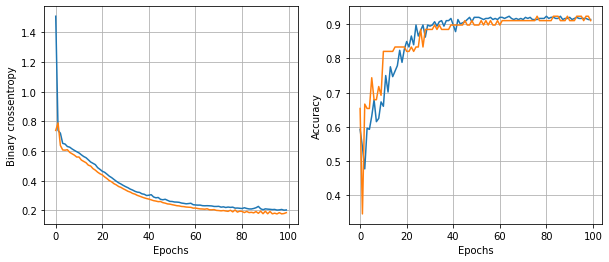

5/5 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.9231
0.23568907380104065
16 nodes, dropout 0, lr 0.01, batch size 64


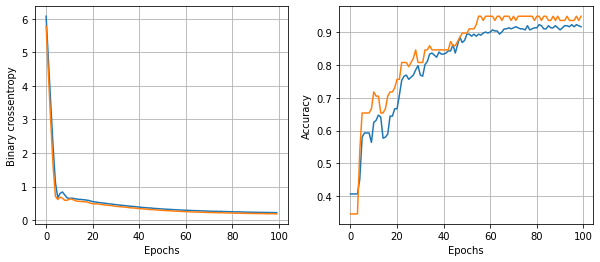

5/5 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.8923
0.25042980909347534
16 nodes, dropout 0, lr 0.01, batch size 128


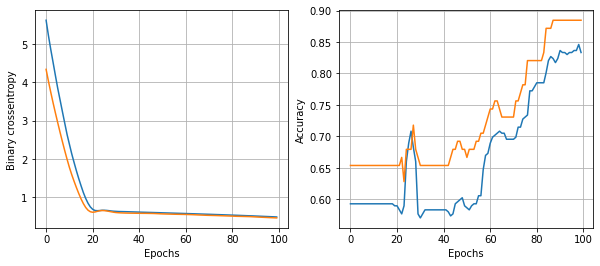

5/5 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8462
0.47642645239830017
16 nodes, dropout 0, lr 0.005, batch size 32


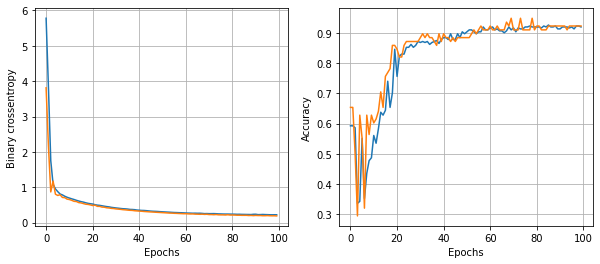

5/5 [==============================] - 0s 977us/step - loss: 0.2452 - accuracy: 0.9231
0.24520638585090637
16 nodes, dropout 0, lr 0.005, batch size 64


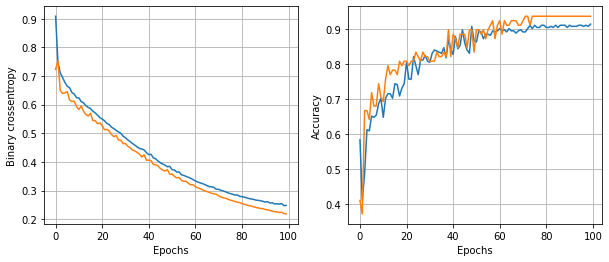

5/5 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9154
0.24311867356300354
16 nodes, dropout 0, lr 0.005, batch size 128


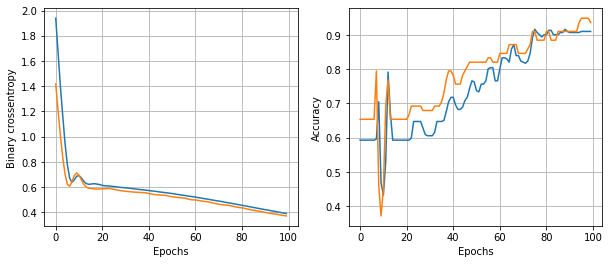

5/5 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.9231
0.3804154694080353
16 nodes, dropout 0, lr 0.001, batch size 32


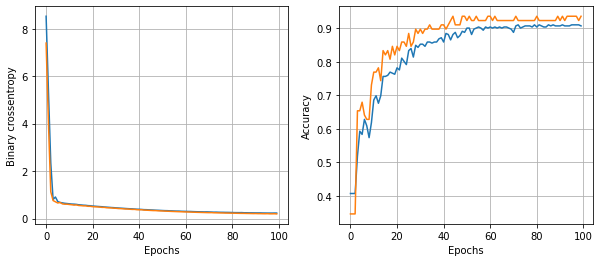

5/5 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9077
0.23959025740623474
16 nodes, dropout 0, lr 0.001, batch size 64


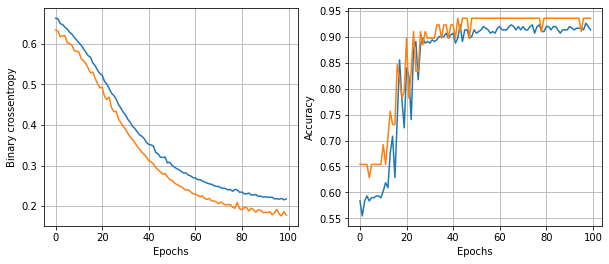

5/5 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.9154
0.24165882170200348
16 nodes, dropout 0, lr 0.001, batch size 128


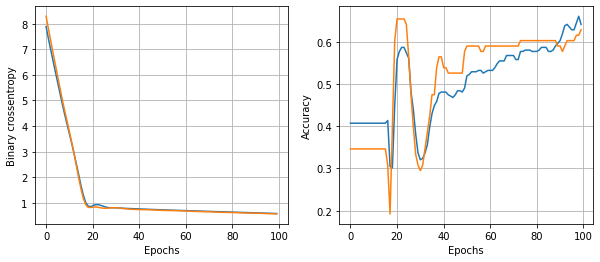

5/5 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.6538
0.5728136897087097
16 nodes, dropout 0.2, lr 0.01, batch size 32


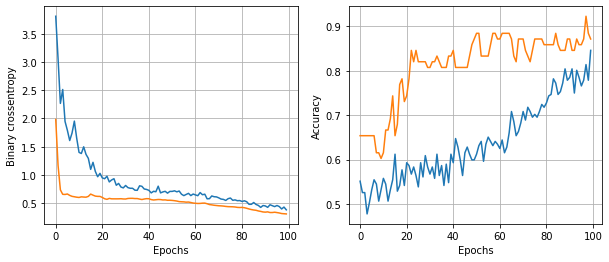

5/5 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8846
0.32161086797714233
16 nodes, dropout 0.2, lr 0.01, batch size 64


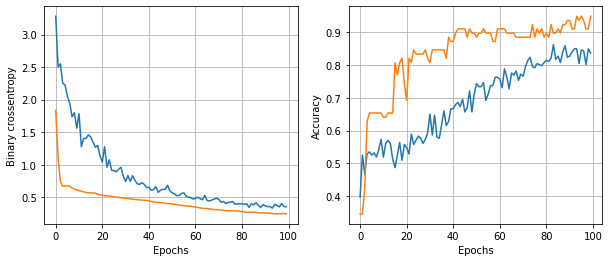

5/5 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9154
0.26757338643074036
16 nodes, dropout 0.2, lr 0.01, batch size 128


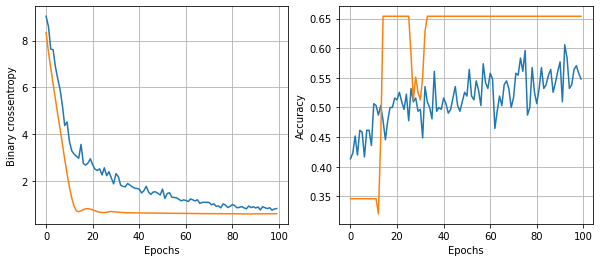

5/5 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6462
0.6241317391395569
16 nodes, dropout 0.2, lr 0.005, batch size 32


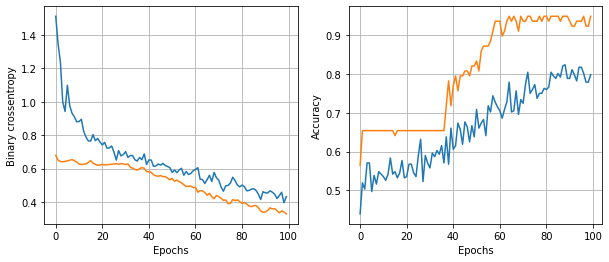

5/5 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8846
0.35927921533584595
16 nodes, dropout 0.2, lr 0.005, batch size 64


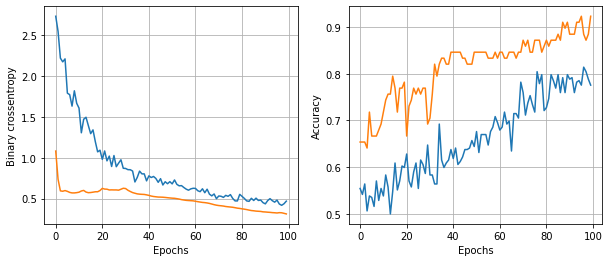

5/5 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8769
0.33412760496139526
16 nodes, dropout 0.2, lr 0.005, batch size 128


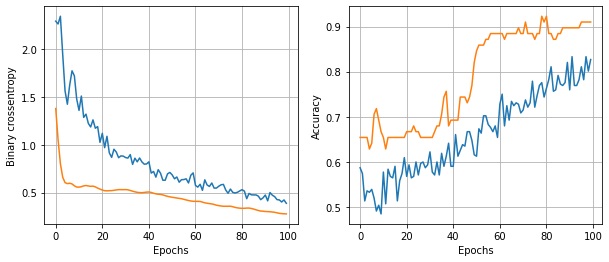

5/5 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8692
0.3070482015609741
16 nodes, dropout 0.2, lr 0.001, batch size 32


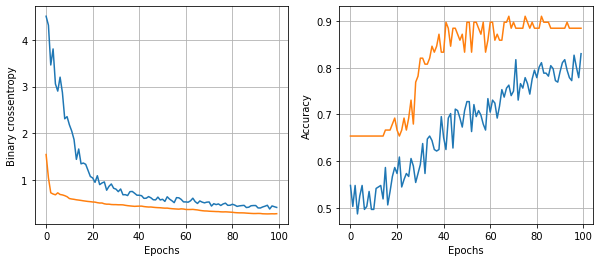

5/5 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.9154
0.29248976707458496
16 nodes, dropout 0.2, lr 0.001, batch size 64


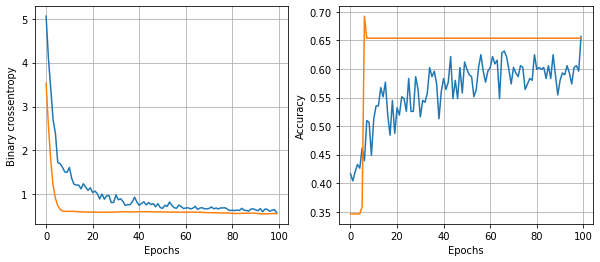

5/5 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.6462
0.5578858256340027
16 nodes, dropout 0.2, lr 0.001, batch size 128


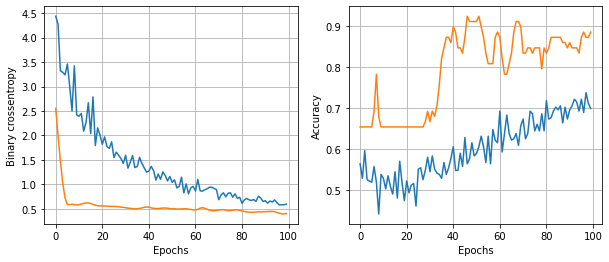

5/5 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8692
0.3964580297470093
32 nodes, dropout 0, lr 0.01, batch size 32


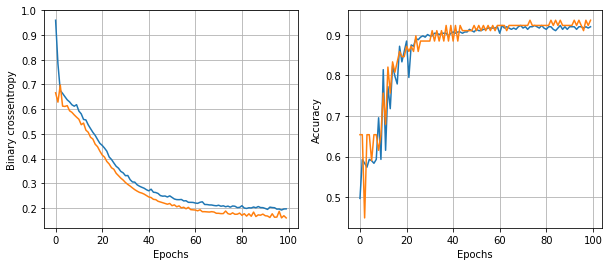

5/5 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.9385
0.1991274356842041
32 nodes, dropout 0, lr 0.01, batch size 64


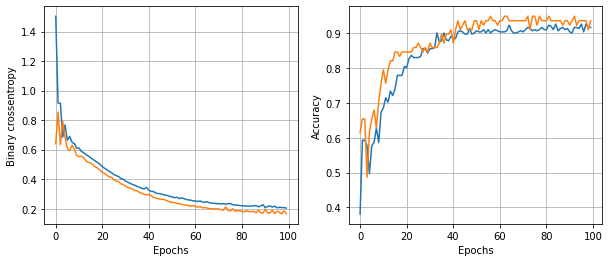

5/5 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9077
0.23041969537734985
32 nodes, dropout 0, lr 0.01, batch size 128


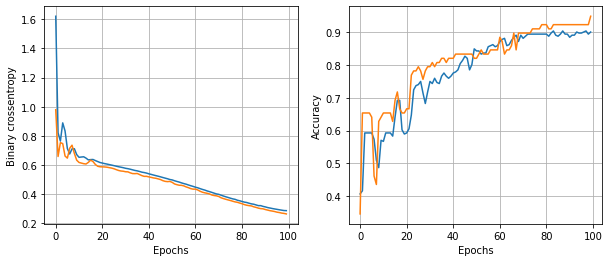

5/5 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9077
0.2837243378162384
32 nodes, dropout 0, lr 0.005, batch size 32


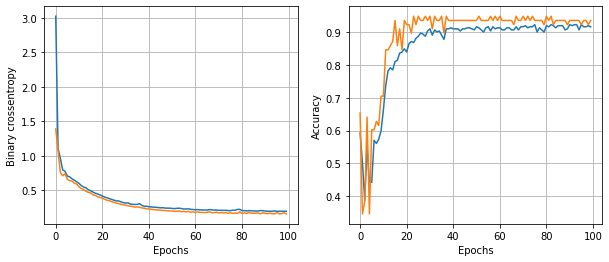

5/5 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9385
0.20579922199249268
32 nodes, dropout 0, lr 0.005, batch size 64


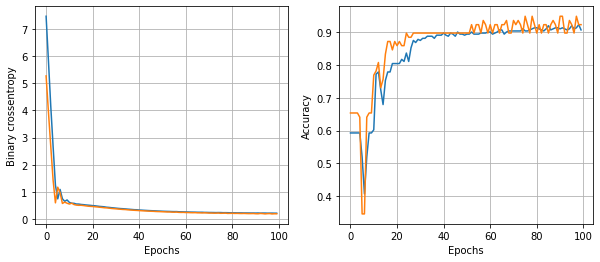

5/5 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9077
0.24833743274211884
32 nodes, dropout 0, lr 0.005, batch size 128


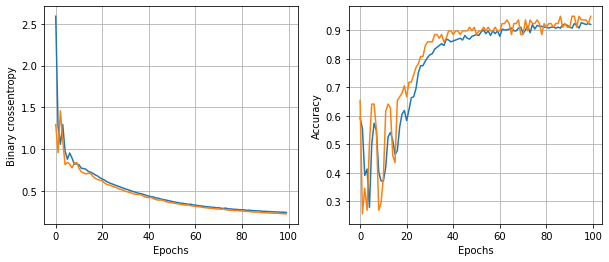

5/5 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9154
0.23006948828697205
32 nodes, dropout 0, lr 0.001, batch size 32


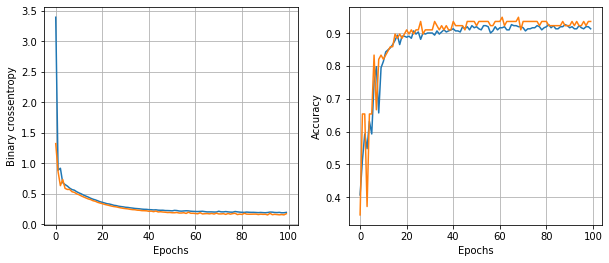

5/5 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9385
0.2069239616394043
32 nodes, dropout 0, lr 0.001, batch size 64


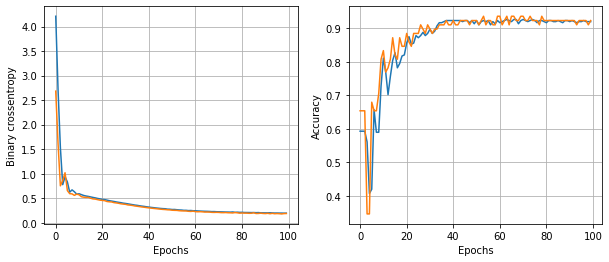

5/5 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9154
0.2277023196220398
32 nodes, dropout 0, lr 0.001, batch size 128


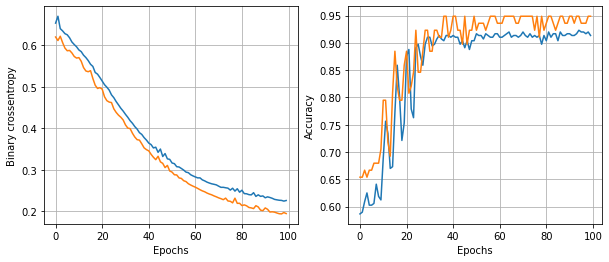

5/5 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.9231
0.23593318462371826
32 nodes, dropout 0.2, lr 0.01, batch size 32


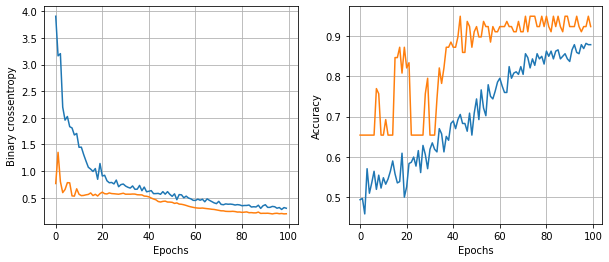

5/5 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9077
0.24713504314422607
32 nodes, dropout 0.2, lr 0.01, batch size 64


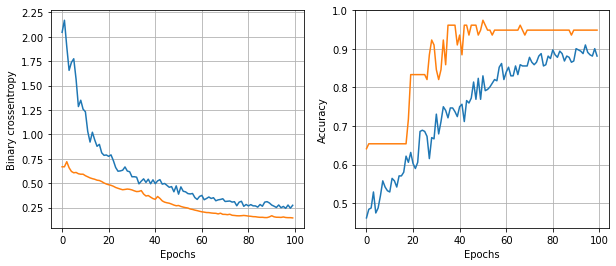

5/5 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9385
0.21479977667331696
32 nodes, dropout 0.2, lr 0.01, batch size 128


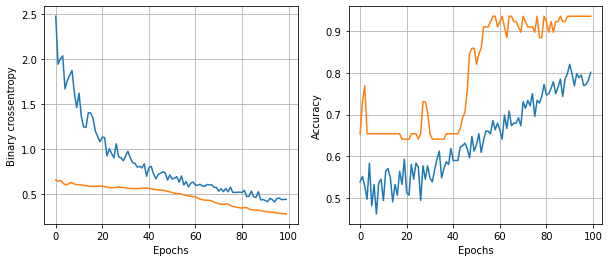

5/5 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8615
0.31941908597946167
32 nodes, dropout 0.2, lr 0.005, batch size 32


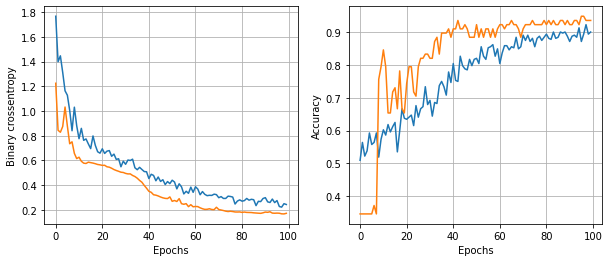

5/5 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9308
0.227243110537529
32 nodes, dropout 0.2, lr 0.005, batch size 64


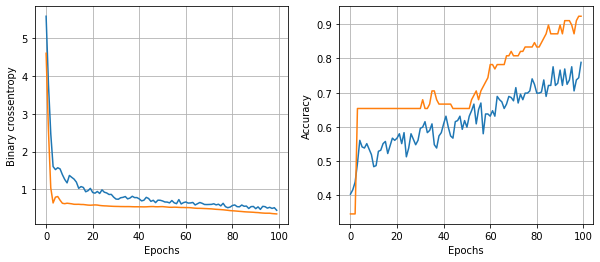

5/5 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8846
0.3573499321937561
32 nodes, dropout 0.2, lr 0.005, batch size 128


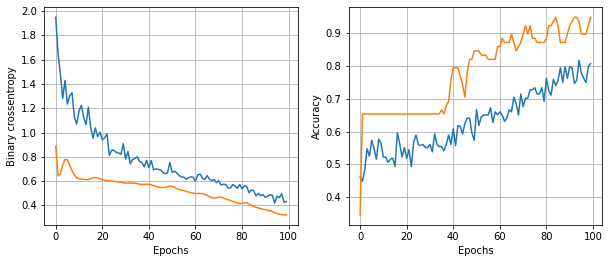

5/5 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.9000
0.33116772770881653
32 nodes, dropout 0.2, lr 0.001, batch size 32


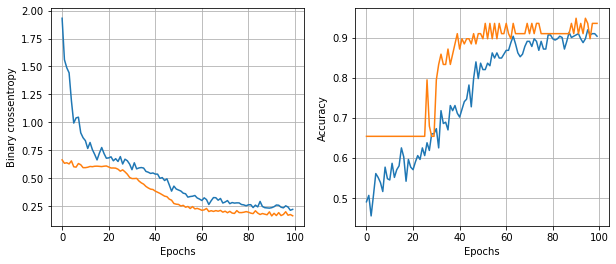

5/5 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9385
0.2142389863729477
32 nodes, dropout 0.2, lr 0.001, batch size 64


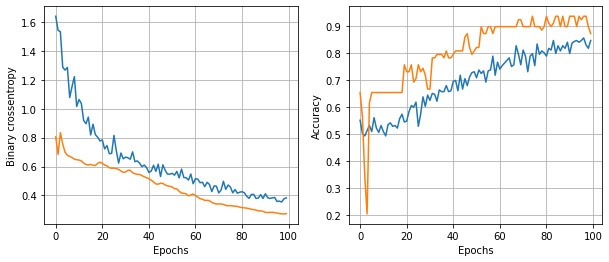

5/5 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8615
0.3216005861759186
32 nodes, dropout 0.2, lr 0.001, batch size 128


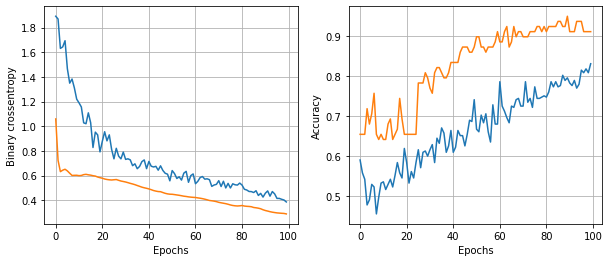

5/5 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8846
0.32673826813697815
64 nodes, dropout 0, lr 0.01, batch size 32


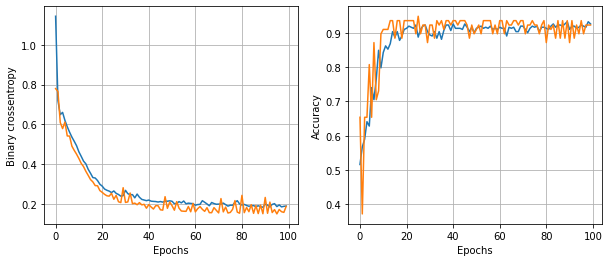

5/5 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.9154
0.21374505758285522
64 nodes, dropout 0, lr 0.01, batch size 64


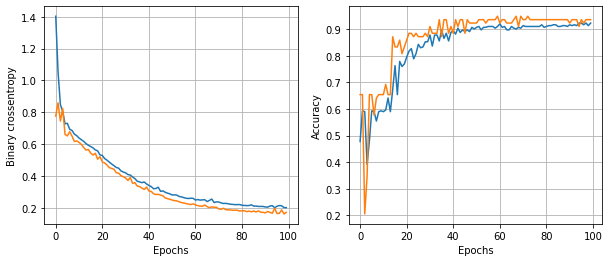

5/5 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9308
0.22158479690551758
64 nodes, dropout 0, lr 0.01, batch size 128


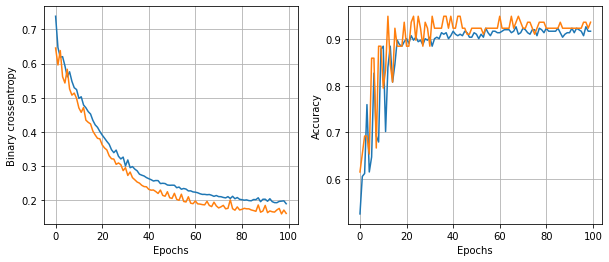

5/5 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9308
0.21219955384731293
64 nodes, dropout 0, lr 0.005, batch size 32


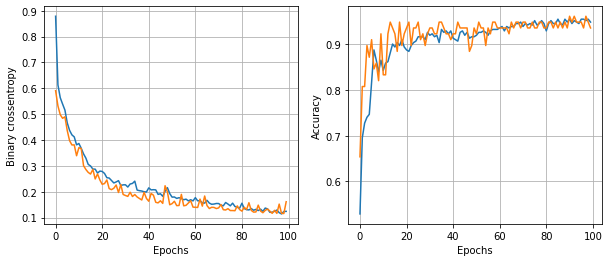

5/5 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9154
0.17561165988445282
64 nodes, dropout 0, lr 0.005, batch size 64


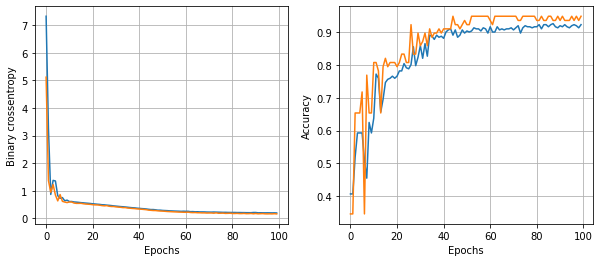

5/5 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9308
0.21257391571998596
64 nodes, dropout 0, lr 0.005, batch size 128


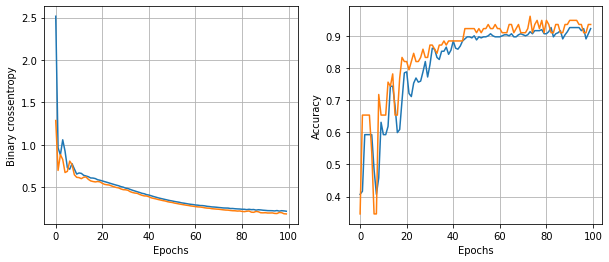

5/5 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9154
0.23398445546627045
64 nodes, dropout 0, lr 0.001, batch size 32


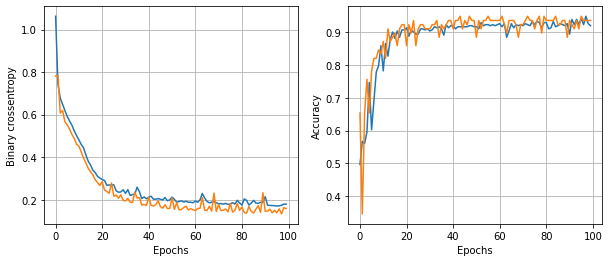

5/5 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9154
0.18890082836151123
64 nodes, dropout 0, lr 0.001, batch size 64


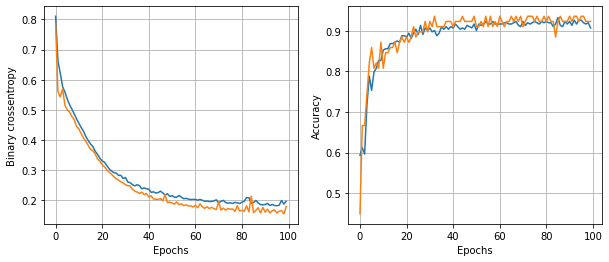

5/5 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9231
0.21341624855995178
64 nodes, dropout 0, lr 0.001, batch size 128


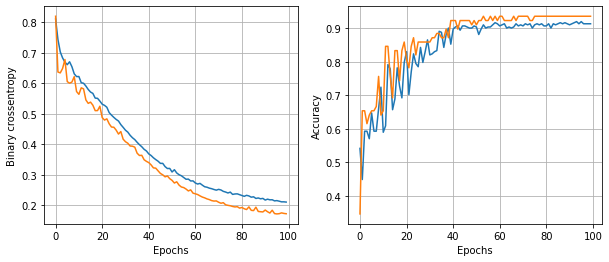

5/5 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9231
0.22562581300735474
64 nodes, dropout 0.2, lr 0.01, batch size 32


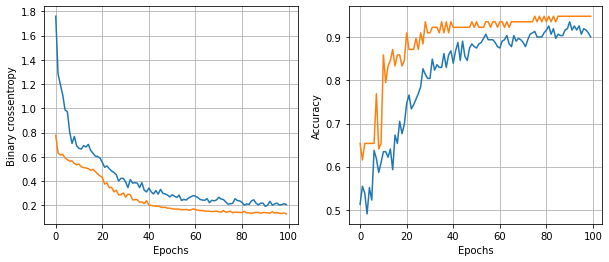

5/5 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9385
0.17653030157089233
64 nodes, dropout 0.2, lr 0.01, batch size 64


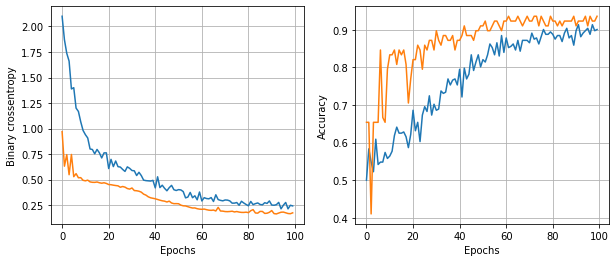

5/5 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9308
0.22154153883457184
64 nodes, dropout 0.2, lr 0.01, batch size 128


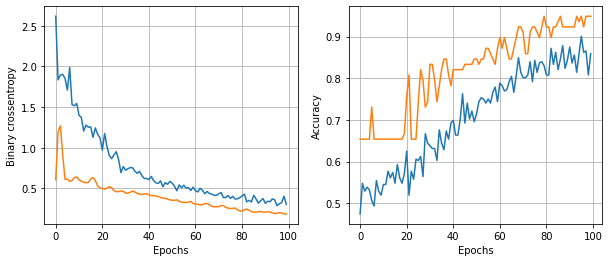

5/5 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9000
0.24109259247779846
64 nodes, dropout 0.2, lr 0.005, batch size 32


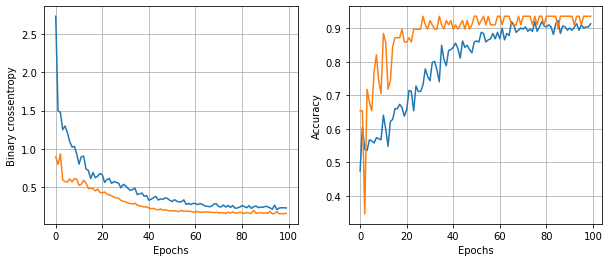

5/5 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9385
0.19748635590076447
64 nodes, dropout 0.2, lr 0.005, batch size 64


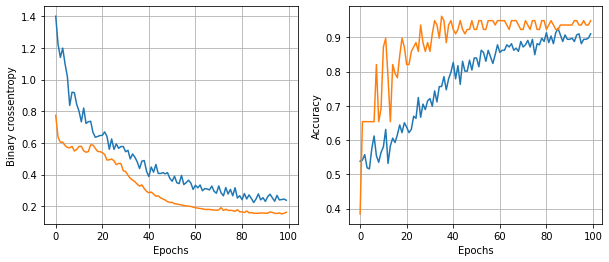

5/5 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9231
0.22101101279258728
64 nodes, dropout 0.2, lr 0.005, batch size 128


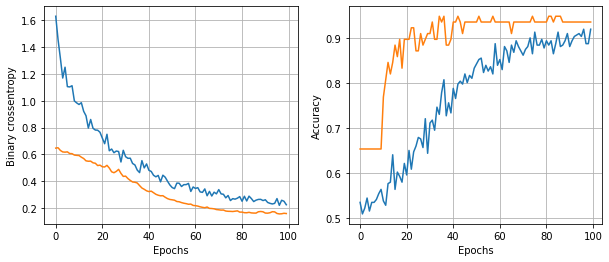

5/5 [==============================] - 0s 1ms/step - loss: 0.2290 - accuracy: 0.9231
0.22904179990291595
64 nodes, dropout 0.2, lr 0.001, batch size 32


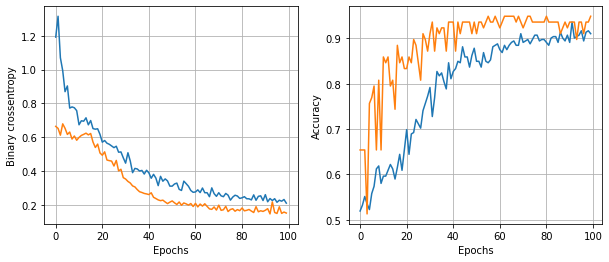

5/5 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9385
0.2138628363609314
64 nodes, dropout 0.2, lr 0.001, batch size 64


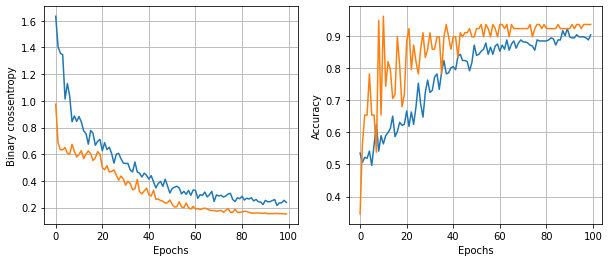

5/5 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9385
0.20268051326274872
64 nodes, dropout 0.2, lr 0.001, batch size 128


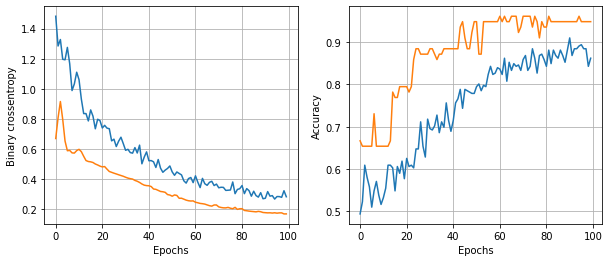

5/5 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.8923
0.24242182075977325


In [36]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(train_features, train_labels, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(test_features, test_labels)[0]
                print(val_loss)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model       

In [38]:
predictions = least_loss_model.predict(test_features)
predictions = (predictions > 0.5).astype(int).reshape(-1,)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

5/5 [==============================] - 0s 977us/step
Accuracy: 91.54 %.


### SVM

In [39]:
from sklearn.svm import SVC

#### Linear SVM

In [40]:
svm_model = SVC(kernel='linear', gamma='auto', C=2)
svm_model = svm_model.fit(train_features, train_labels)

In [41]:
predictions = svm_model.predict(test_features)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.08 %.


#### Poly SVM

In [42]:
svm_model = SVC(kernel='poly', gamma='auto', C=2)
svm_model = svm_model.fit(train_features, train_labels)

In [43]:
predictions = svm_model.predict(test_features)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.69 %.


#### Kernel SVM

In [44]:
svm_model = SVC(kernel='rbf', gamma='auto', C=2)
svm_model = svm_model.fit(train_features, train_labels)

In [45]:
predictions = svm_model.predict(test_features)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.38 %.


#### Sigmoid SVM

In [46]:
svm_model = SVC(kernel='sigmoid', gamma='auto', C=2)
svm_model = svm_model.fit(train_features, train_labels)

In [47]:
predictions = svm_model.predict(test_features)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 64.62 %.



### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_features, train_labels)

LogisticRegression(max_iter=1000)

In [65]:
predictions = lr_model.predict(test_features)
accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.08 %.



### K-Nearest Neighbours

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
highest_accuracy = 0
for neighbors in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(train_features, train_labels)
    predictions = knn_model.predict(test_features)
    accuracy = (predictions.shape[0] - np.sum(abs(predictions - test_labels)))/predictions.shape[0] * 100
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
print('Accuracy:', round(highest_accuracy, 2), '%.')

Accuracy: 93.08 %.
